In [234]:
import pandas as pd
X = pd.read_excel('lr2.xlsx').dropna().drop(columns=['ОКЭР (регион), данные на 2013 год', 'Ybin'])
X.head()

,х1,х2,х3,х4,х5,х6,x7,x8,x9
1,9.5,16.3,6.8,5.6,17.4,163.0,151.0,23.6,2344.0
2,10.3,12.6,7.2,5.5,25.3,194.0,239.0,9.2,1809.0
3,9.7,4.6,6.5,4.2,16.2,152.0,192.0,26.9,2406.0
4,9.6,6.2,6.1,4.0,17.4,190.0,205.0,20.1,2023.0
5,9.1,11.4,7.7,6.4,5.9,183.0,198.0,22.0,1419.0


### Нормирование

In [235]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

X = pd.DataFrame(robust_scaler.fit_transform(X))

### Иерархическая кластеризация

Complete linkage - дальний сосед

In [236]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.cluster import AgglomerativeClustering

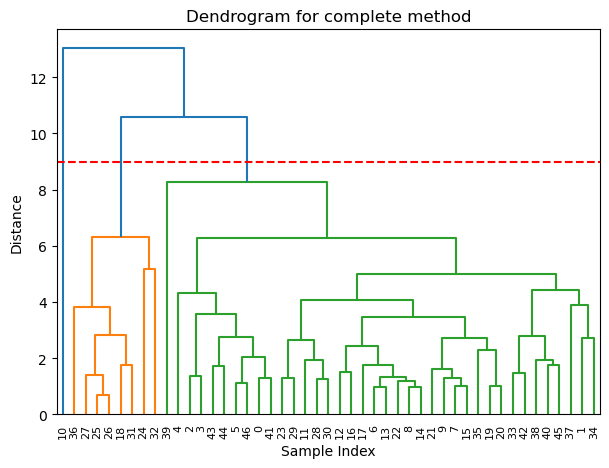

In [237]:
linkage_matrix = linkage(X, method='complete') # создает матрицу связей (linkage matrix), которая
#содержит информацию о том, как группы или отдельные точки объединяются в кластеры на каждом шаге кластеризации.
plt.figure(figsize=(7, 5))
dendrogram(linkage_matrix) 
plt.axhline(y=9, color='r', linestyle='--')  
plt.title('Dendrogram for complete method')
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [238]:
linkage_matrix
# 1 столбец: индекс комбинируемого кластера
# 2 столбец: индекс комбинируемого кластера
# 3 столбец: расстояние между скомбинированными кластерами
# 4 столбец: количество исходных наблюдений во вновь сформированном кластере.

array([[25.        , 26.        ,  0.69103891,  2.        ],
       [ 8.        , 14.        ,  0.97696495,  2.        ],
       [ 6.        , 13.        ,  0.98816142,  2.        ],
       [19.        , 20.        ,  1.01200957,  2.        ],
       [ 7.        , 15.        ,  1.02922136,  2.        ],
       [ 5.        , 46.        ,  1.12477425,  2.        ],
       [22.        , 48.        ,  1.20615103,  3.        ],
       [28.        , 30.        ,  1.25818956,  2.        ],
       [23.        , 29.        ,  1.29073329,  2.        ],
       [ 0.        , 41.        ,  1.29751173,  2.        ],
       [ 9.        , 51.        ,  1.30798324,  3.        ],
       [49.        , 53.        ,  1.32836148,  5.        ],
       [ 2.        ,  3.        ,  1.35841206,  2.        ],
       [27.        , 47.        ,  1.40492742,  3.        ],
       [33.        , 42.        ,  1.48481207,  2.        ],
       [12.        , 16.        ,  1.50716099,  2.        ],
       [21.        , 57.

In [239]:
# Извлечение расстояний между кластерами из матрицы 'linkage'
distances = linkage_matrix[:, 2]
# Нахождение наибольшего перепада
gaps = np.diff(distances)
best_cluster_idx = np.argmax(gaps)
# Оптимальное количество кластеров — это (индекс самого большого перепада + 1)
optimal_clusters = len(distances) - best_cluster_idx + 1
print(f'Оптимальное количество кластеров: {optimal_clusters}')

Оптимальное количество кластеров: 3


In [240]:
model = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_clusters = model.fit_predict(X)
complete_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

* n_clusters. default=2
* metric. default=”euclidean”
* linkage. {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
‘ward’ минимизирует дисперсию объединяемых кластеров.
‘average’ использует среднее значение расстояний каждого наблюдения из двух наборов. центр класт.
‘полная" или ‘максимальная’ привязка использует максимальные расстояния между всеми наблюдениями двух наборов. дальний сосед
‘одиночная’ использует минимальное из расстояний между всеми наблюдениями двух наборов.ближний сосед
* distance_threshold. Пороговое значение расстояния связывания, при достижении которого кластеры не будут объединены. Если не равно None, n_clusters должно быть None, а compute_full_tree должно быть True.
* memory. used to cache the output of the computation of the tree. default = none
* connectivity
* compute_full_tree. Полное дерево используется для создания полной дендрограммы.

Average linkage - среднее

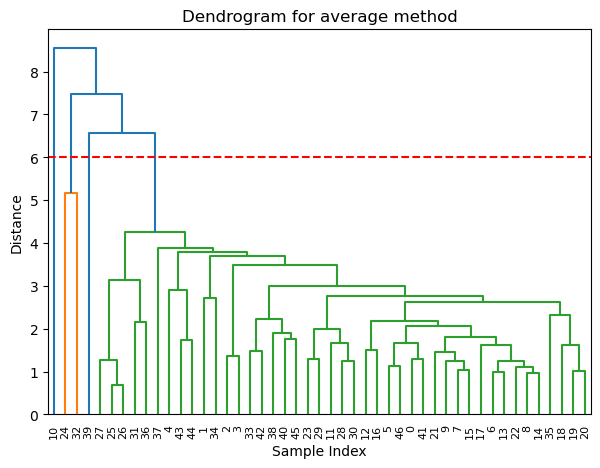

In [241]:
linkage_matrix = linkage(X, method='average') 
plt.figure(figsize=(7, 5))
dendrogram(linkage_matrix) 
plt.axhline(y=6, color='r', linestyle='--')  
plt.title('Dendrogram for average method')
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [242]:
model = AgglomerativeClustering(n_clusters=4, linkage='average')
average_clusters = model.fit_predict(X)
average_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

Single linkage - ближайший сосед

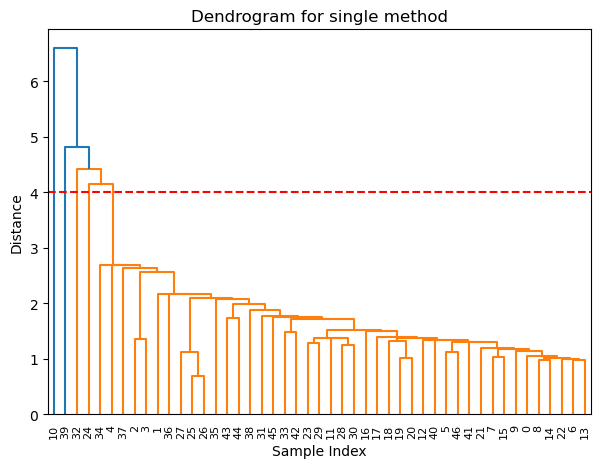

In [243]:
linkage_matrix = linkage(X, method='single') 
plt.figure(figsize=(7, 5))
dendrogram(linkage_matrix) 
plt.axhline(y=4, color='r', linestyle='--')  
plt.title('Dendrogram for single method')
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [244]:
model = AgglomerativeClustering(n_clusters=5, linkage='single')
single_clusters = model.fit_predict(X)
single_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

### K-means

c:\Users\an23m\anaconda3\envs\pad\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\an23m\anaconda3\envs\pad\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\an23m\anaconda3\envs\pad\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\an23m\anaconda3\envs\pad\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

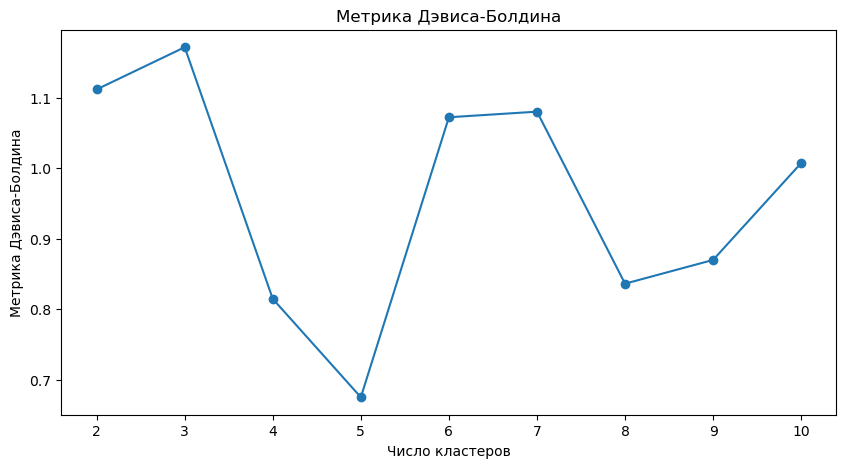

Оптимальное количество кластеров: 5


[1.1116610288707152,
 1.1715341098174863,
 0.8145418940731463,
 0.6749996835180799,
 1.0721802977988515,
 1.0801094375552733,
 0.836096006082837,
 0.8697721856297598,
 1.0072269382339056]

In [245]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

range_n_clusters = range(2, 11)  

db_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=43)

    kmeans.fit(X)
    labels = kmeans.predict(X)

    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)


plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, db_scores, marker='o')
plt.title('Метрика Дэвиса-Болдина')
plt.xlabel('Число кластеров')
plt.ylabel('Метрика Дэвиса-Болдина')
plt.xticks(range_n_clusters)
plt.show()

optimal_n_clusters = range_n_clusters[np.argmin(db_scores)]
print(f'Оптимальное количество кластеров: {optimal_n_clusters}')
db_scores


Метрика Дэвиса-Болдина (Davies-Bouldin Index, DBI) используется для оценки качества кластеризации. Она измеряет среднюю степень сходства между каждым кластером и его наиболее похожим кластером. Чем ниже значение этой метрики, тем лучше кластеризация, так как это указывает на более четкое разделение кластеров.


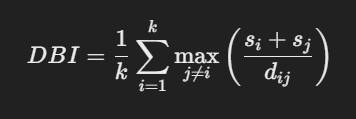

При большом количестве кластеров модель может слишком точно подстраиваться под данные, включая шум и выбросы, что приводит к ухудшению обобщающей способности модели на новых данных

Сказать про изменение значений в зависимости от random state. Стабильно 5 в числе лидеров

In [246]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=43)

kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)
kmeans_clusters

c:\Users\an23m\anaconda3\envs\pad\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### Индекс Рэнда

Для выбора лучшей кластеризации из п.3 воспользуемся метрикой Дэвиса-Болдина

In [247]:
db_score = davies_bouldin_score(X, average_clusters)
print('average_clusters', db_score)
db_score = davies_bouldin_score(X, single_clusters)
print('single_clusters', db_score)
db_score = davies_bouldin_score(X, complete_clusters)
print('complete_clusters', db_score)


average_clusters 0.5251163305312606
single_clusters 0.3298635427432368
complete_clusters 0.8520251322876966


возьмем complete_clusters как лучшую, т.к. там разбиение более удачное по дендрограмме

Индекс Рэнда: Он принимает значения от 0 до 1, где 0 означает, что кластеризации не имеют ничего общего, а 1 означает, что они идентичны.

In [248]:
from sklearn.metrics import adjusted_rand_score

rand_index = adjusted_rand_score(complete_clusters, kmeans_clusters) # comp - 3
print(f'Индекс Рэнда: {rand_index}')

Индекс Рэнда: 0.8056450910358045


In [249]:
rand_index = adjusted_rand_score(average_clusters, kmeans_clusters) # av - 4 cl
print(f'Индекс Рэнда: {rand_index}')

Индекс Рэнда: 0.3152440173355945


In [250]:
rand_index = adjusted_rand_score(single_clusters, kmeans_clusters)
print(f'Индекс Рэнда: {rand_index}')

Индекс Рэнда: 0.3177323665128543


написать выводы о том сколько кластеров по графику и сколько тут

### Среднее значение признаков в кластерах

возьмем kmeans_clusters

In [251]:
df = pd.read_excel('lr2.xlsx').dropna().drop(columns=['Ybin'])
df['y'] = kmeans_clusters

df.head()
df.sort_values('y')

,"ОКЭР (регион), данные на 2013 год",х1,х2,х3,х4,х5,х6,x7,x8,x9,y
1,Республика Карелия,9.5,16.3,6.8,5.6,17.4,163.0,151.0,23.6,2344.0,0
30,Нижегородская область,9.0,17.5,6.7,4.0,16.4,181.0,182.0,22.0,1773.0,0
87,Сахалинская область,9.9,17.0,7.2,5.7,22.7,145.0,169.0,24.6,3588.0,0
52,Красноярский край,11.0,15.3,8.8,5.0,19.2,175.0,160.0,32.4,1565.0,0
53,Ставропольский край,11.7,13.5,8.1,4.5,21.7,151.0,154.0,39.6,1325.0,0
54,Ростовская область,10.2,15.8,8.0,4.8,18.7,146.0,140.0,33.4,1497.0,0
74,Республика Хакасия,10.9,14.0,7.1,4.4,24.6,161.0,201.0,25.3,2222.0,0
75,Красноярский край,10.8,14.0,7.2,4.8,19.8,246.0,296.0,24.2,2417.0,0
29,Кировская область,9.1,16.3,6.2,3.9,17.1,137.0,121.0,32.0,1774.0,0
76,Иркутская область,11.6,14.6,6.3,3.3,18.1,170.0,215.0,32.3,2317.0,0


In [252]:
df.rename(columns={
    'х1': 'рождаемость населения на 1000 человек',
    'х2': 'смертность населения на 1000 человек',
    'х3': 'число браков на 1000 человек',
    'х4': 'число разводов на 1000 человек',
    'х5': 'коэффициент младенческой смертности',
    'х6': 'соотношение денежного дохода и прожиточного минимума, %',
    'x7': 'соотношение средней оплаты труда и прожиточного минимума трудоспособного населения, %',
    'x8': 'численность населения с денежными доходами ниже прожиточного минимума в % от численности населения',
    'x9': 'число зарегистрированных преступлений на 100000 населения'
}, inplace=True)
df.head()

,"ОКЭР (регион), данные на 2013 год",рождаемость населения на 1000 человек,смертность населения на 1000 человек,число браков на 1000 человек,число разводов на 1000 человек,коэффициент младенческой смертности,"соотношение денежного дохода и прожиточного минимума, %","соотношение средней оплаты труда и прожиточного минимума трудоспособного населения, %",численность населения с денежными доходами ниже прожиточного минимума в % от численности населения,число зарегистрированных преступлений на 100000 населения,y
1,Республика Карелия,9.5,16.3,6.8,5.6,17.4,163.0,151.0,23.6,2344.0,0
2,Республика Коми,10.3,12.6,7.2,5.5,25.3,194.0,239.0,9.2,1809.0,0
3,Архангельская область,9.7,4.6,6.5,4.2,16.2,152.0,192.0,26.9,2406.0,0
4,Вологодская область,9.6,6.2,6.1,4.0,17.4,190.0,205.0,20.1,2023.0,0
5,Мурманская область,9.1,11.4,7.7,6.4,5.9,183.0,198.0,22.0,1419.0,0


In [253]:
cluster_means = pd.DataFrame(df.drop(columns=['ОКЭР (регион), данные на 2013 год'])).groupby('y').mean()
cluster_means

,рождаемость населения на 1000 человек,смертность населения на 1000 человек,число браков на 1000 человек,число разводов на 1000 человек,коэффициент младенческой смертности,"соотношение денежного дохода и прожиточного минимума, %","соотношение средней оплаты труда и прожиточного минимума трудоспособного населения, %",численность населения с денежными доходами ниже прожиточного минимума в % от численности населения,число зарегистрированных преступлений на 100000 населения
y,,,,,,,,,
0,9.983333,14.347222,7.161111,5.027778,18.688889,167.416667,169.583333,26.6000,2021.944444
1,21.000000,13.000000,5.900000,1.900000,28.000000,84.000000,101.000000,73.2000,2713.000000
2,12.637500,12.500000,6.937500,3.450000,16.912500,122.625000,118.750000,47.1125,1670.750000
3,22.800000,7.500000,6.900000,1.300000,17.600000,86.000000,79.000000,41.5000,673.000000
4,9.000000,16.900000,8.200000,4.600000,15.500000,520.000000,197.000000,19.1000,1066.000000


*Кластер 0*

Кластер характеризуется низкой рождаемостью (9.98) и средней смертностью (14.35). Самое высокое число разводов (5.03), число браков среднее (7.16). Коэффициент младенческой смертности (18.69) также на среднем уровне. Соотношение денежного дохода и прожиточного минимума умеренное. Показатель числа зарегистрированных преступлений довольно высок.

Название: "Умеренные регионы с низкой рождаемостью"

*Кластер 1*

Описание: Высокая рождаемость (21.00) и низкая смертность (13.00) сочетаются с низкими показателями браков (5.90) и разводов (1.90). Высокий коэффициент младенческой смертности (28.00) указывает на проблемы в здравоохранении. Низкое соотношение дохода и прожиточного минимума (84.00) указывает на экономические проблемы. Показатель числа зарегистрированных преступлений является самым высоким.

Логичное название: "Неблагополучные регионы"

*Кластер 2*

Описание: Кластер с умеренной рождаемостью (12.64) и смертностью (12.50). Число разводов (3.45) и браков (6.94) на среднем уровне. Коэффициент младенческой смертности (16.91) также близок к среднему. Cоотношение денежного дохода и прожиточного минимума, а также уровень преступности стремятся к среднему (1670). 

Логичное название: "Сбалансированные регионы"

*Кластер 3*

Описание: Высокая рождаемость (22.80) и очень низкая смертность (7.50). Низкие показатели разводов (1.30) и умеренные браки (6.90). Коэффициент младенческой смертности (17.60) указывает на достаточный уровень здравоохранения. Соотношение дохода и прожиточного минимума (86.00) также на низком уровне. Число преступлений является самым низким по сравнению с остальными кластерами (673.00).

Логичное название: "Демографически стабильные и безопасные регионы"

*Кластер 4*

Описание: Низкая рождаемость (9.00) и высокая смертность (16.90). Высокий уровень разводов (4.60) и браков (8.20) указывает на проблемы в социальной сфере. Низкий коэффициент младенческой смертности (15.50) указывает на отличную медицинскую помощь. Соотношение дохода и прожиточного минимума (520.00) является лучшим среди всех кластеров (превосходит в в несколько раз) и указывает на хорошие экономические условия. Число зарегистрированных преступленний умеренное (1066.00)

Логичное название: "Экономически развитые регионы со слабой демографией"